## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Objective:
To identify the most potential leads , which inturn leads to paying customers for an education company
## Methodology:
We followed the following methodology to achieve the above objective:

    Data Cleaning
    Model building
    Recommendations

In [1]:
# importing libraries to Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries to perform the analysis
# Importing Pandas and NumPy
import pandas as pd, numpy as np
#importing libraries for Data visualization - EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Getting Data from dataset
lead_score_df = pd.read_csv("leads.csv")
#reading top 5 rows in dataset
lead_score_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# renaming the columns by replacing the space with _
lead_score_df.columns = lead_score_df.columns.str.replace(' ','_')

In [5]:
# dimensions of the dataframe
lead_score_df.shape

(9240, 37)

In [6]:
# describing of data frame
lead_score_df.describe()

,Lead_Number,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Asymmetrique_Activity_Score,Asymmetrique_Profile_Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# type of each column
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect_ID                                      9240 non-null object
Lead_Number                                      9240 non-null int64
Lead_Origin                                      9240 non-null object
Lead_Source                                      9204 non-null object
Do_Not_Email                                     9240 non-null object
Do_Not_Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9240 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
# cehcking for the null values in data frame
lead_score_df.isnull().sum().sort_values(ascending = False)

Lead_Quality                                     4767
Asymmetrique_Profile_Score                       4218
Asymmetrique_Activity_Score                      4218
Asymmetrique_Profile_Index                       4218
Asymmetrique_Activity_Index                      4218
Tags                                             3353
What_matters_most_to_you_in_choosing_a_course    2709
Lead_Profile                                     2709
What_is_your_current_occupation                  2690
Country                                          2461
How_did_you_hear_about_X_Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page_Views_Per_Visit                              137
Last_Activity                                     103
Lead_Source                                        36
Do_Not_Email                                        0
Do_Not_Call                 

In [9]:
# checking the percentage of null values of each column.
round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2).sort_values(ascending = False)

Lead_Quality                                     51.59
Asymmetrique_Profile_Score                       45.65
Asymmetrique_Activity_Score                      45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Index                      45.65
Tags                                             36.29
What_matters_most_to_you_in_choosing_a_course    29.32
Lead_Profile                                     29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Do_Not_Email                                      0.00
Do_Not_Cal

In [10]:
# Missing columns:
# We are selecting the missing columns which are contains more than 30% of missing vales
missing_columns = lead_score_df.columns[100*(lead_score_df.isnull().sum()/len(lead_score_df.index)) > 30]
#printing the missing columns 
print(missing_columns)


Index(['Tags', 'Lead_Quality', 'Asymmetrique_Activity_Index',
       'Asymmetrique_Profile_Index', 'Asymmetrique_Activity_Score',
       'Asymmetrique_Profile_Score'],
      dtype='object')


In [11]:
# We are removing the columns where missing values are more than 30%, becuase if the column contians more than 30% of the missing values the data set behaves extreme levels during the train - test model building. 
lead_score_df = lead_score_df.drop(missing_columns, axis=1)
lead_score_df

,Prospect_ID,Lead_Number,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,...,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,NaN,NaN,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,NaN,NaN,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,No,No,No,No,NaN,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,No,No,No,No,NaN,Mumbai,No,No,Email Opened


In [12]:
#shape of the data frame after removing the missing columns
lead_score_df.shape

(9240, 31)

In [13]:
# Dropping the unique value columns such as Prospect_ID and Lead_Number.
lead_score_df = lead_score_df.drop(['Prospect_ID','Lead_Number'],axis=1)

In [14]:
# shape of the Data frame after removing the unique value columns and missing columns
lead_score_df.shape

(9240, 29)

In [15]:
# information of the updated data frame 
lead_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
Lead_Origin                                      9240 non-null object
Lead_Source                                      9204 non-null object
Do_Not_Email                                     9240 non-null object
Do_Not_Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9240 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How_did_you_hear_about_X_Education               7033 non-null object
What_is_your_current_occupation                  6550

In [16]:
# getting the top 5 rows of the updated data frame after removing the missing values and unique columns
lead_score_df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,...,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [17]:
#Extracting numerical / contineous variables for further analysis
num_var= [i for i in lead_score_df.columns if lead_score_df.dtypes[i]!='object']
cat_var = [i for i in lead_score_df.columns if lead_score_df.dtypes[i] =='object']

In [18]:
# checking the numerical variables
num_var


['Converted',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit']

In [19]:
# checking the Categorical variables
cat_var

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Last_Activity',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Magazine',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'Receive_More_Updates_About_Our_Courses',
 'Update_me_on_Supply_Chain_Content',
 'Get_updates_on_DM_Content',
 'Lead_Profile',
 'City',
 'I_agree_to_pay_the_amount_through_cheque',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [20]:
# Checking for the missing values agian 
round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2).sort_values(ascending = False)

Lead_Profile                                     29.32
What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
How_did_you_hear_about_X_Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Last_Notable_Activity                             0.00
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
Total_Time_Spent_on_Website                       0.00
Search                                            0.00
A_free_copy_of_Mastering_The_Interview            0.00
Magazine  

In [21]:
# Describing of data frame
lead_score_df.describe()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [22]:
#Converting the values of categorical variables to lower case
# This is to because few columns are having like  Google and google are different.To make unique of all values, we are concverting into lower case.
lead_score_df = lead_score_df.applymap (lambda x: x.lower() if  type(x) == str else x)

In [23]:
# Viweing the all the unique values in the dataset
for i in cat_var:
    print(i,lead_score_df[i].unique(),'\n')

Lead_Origin ['api' 'landing page submission' 'lead add form' 'lead import'
 'quick add form'] 

Lead_Source ['olark chat' 'organic search' 'direct traffic' 'google' 'referral sites'
 'welingak website' 'reference' 'facebook' nan 'blog' 'pay per click ads'
 'bing' 'social media' 'welearn' 'click2call' 'live chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm'] 

Do_Not_Email ['no' 'yes'] 

Do_Not_Call ['no' 'yes'] 

Last_Activity ['page visited on website' 'email opened' 'unreachable'
 'converted to lead' 'olark chat conversation' 'email bounced'
 'email link clicked' 'form submitted on website' 'unsubscribed'
 'had a phone conversation' 'view in browser link clicked' nan
 'approached upfront' 'sms sent' 'visited booth in tradeshow'
 'resubscribed to emails' 'email received' 'email marked spam'] 

Country [nan 'india' 'russia' 'kuwait' 'oman' 'united arab emirates'
 'united states' 'australia' 'united kingdom' 'bahrain' 'ghana'
 'singapore' 'qatar' 'saudi arabia

In [24]:
# Replacing the Select values and NAN values to others of the few columns
lead_score_df.Lead_Profile.replace('select','other leads', inplace=True)
lead_score_df.Lead_Profile.replace(np.nan,'other leads', inplace=True)
lead_score_df.Specialization.replace('select','other',inplace=True)
lead_score_df.Specialization.replace(np.nan,'other',inplace=True)
lead_score_df.City.replace('select','other cities',inplace=True)
lead_score_df.City.replace(np.nan,'other cities',inplace=True)
lead_score_df.How_did_you_hear_about_X_Education.replace('select','other',inplace=True)
lead_score_df.How_did_you_hear_about_X_Education.replace(np.nan,'other',inplace=True)

In [25]:
# Check again for the missing values.
round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2).sort_values(ascending = False)

What_matters_most_to_you_in_choosing_a_course    29.32
What_is_your_current_occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Lead_Source                                       0.39
Last_Notable_Activity                             0.00
Do_Not_Email                                      0.00
Do_Not_Call                                       0.00
Converted                                         0.00
Total_Time_Spent_on_Website                       0.00
Specialization                                    0.00
How_did_you_hear_about_X_Education                0.00
Search                                            0.00
A_free_copy_of_Mastering_The_Interview            0.00
Magazine                                          0.00
Newspaper_Article                                 0.00
X_Educatio

From the above, There are few columns where missing values are less than 30% which needs to be treated before proceeding further. the following columns are required missing value treatment:

    What_matters_most_to_you_in_choosing_a_course    29.32
    What_is_your_current_occupation                  29.11
    Country                                          26.63
    TotalVisits                                       1.48
    Page_Views_Per_Visit                              1.48
    Last_Activity                                     1.11
    Lead_Source                                       0.39

In [26]:
# Lets take What_matters_most_to_you_in_choosing_a_course of different values 
lead_score_df['What_matters_most_to_you_in_choosing_a_course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [27]:
#converting What_matters_most_to_you_in_choosing_a_course into two categories
# This is because The data distribution is contains with Better career prospects and nan values. hence we are making it as two values and remainng all are converted into other values
lead_score_df.What_matters_most_to_you_in_choosing_a_course.replace('flexibility & convenience','other', inplace=True)
lead_score_df.What_matters_most_to_you_in_choosing_a_course.replace(np.nan,'other', inplace=True)
lead_score_df['What_matters_most_to_you_in_choosing_a_course'].value_counts()

better career prospects    6528
other                      2712
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

In [28]:
# Lets take What_is_your_current_occupation value counts

lead_score_df['What_is_your_current_occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What_is_your_current_occupation, dtype: int64

In [29]:
# Lets make the similar way with the above to move to Other categories.
lead_score_df.What_is_your_current_occupation.replace('housewife','other', inplace=True)
lead_score_df.What_is_your_current_occupation.replace(np.nan,'other', inplace=True)
lead_score_df.What_is_your_current_occupation.replace('businessman','other', inplace=True) 
lead_score_df['What_is_your_current_occupation'].value_counts()

unemployed              5600
other                   2724
working professional     706
student                  210
Name: What_is_your_current_occupation, dtype: int64

In [30]:
# Lets do Missing treatment values with the Country Column
lead_score_df['Country'].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
germany                    4
nigeria                    4
canada                     4
south africa               4
kuwait                     4
sweden                     3
china                      2
asia/pacific region        2
philippines                2
belgium                    2
netherlands                2
italy                      2
ghana                      2
bangladesh                 2
uganda                     2
malaysia                   1
liberia                    1
vietnam                    1
kenya                      1
indonesia                  1
sri lanka                  1
denmark       

In [31]:
#Combining countries with less than 10 records to others
lead_score_df.Country.replace(np.nan,'unknown', inplace=True)
for z,c in dict(lead_score_df.Country.value_counts()).items():
    if c < 10:
        lead_score_df.Country.replace(z,'other',inplace=True)
lead_score_df['Country'].value_counts()

india                   6492
unknown                 2466
other                     77
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
Name: Country, dtype: int64

In [32]:
# Lets do with the Total Visits column
lead_score_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [33]:
#checking for summary of totalvisits
lead_score_df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [34]:
#Checking for median of totalvisits
lead_score_df.TotalVisits.median()

3.0

In [35]:
#Replace missing values by the median
lead_score_df.TotalVisits.fillna(lead_score_df.TotalVisits.median(),inplace=True)
lead_score_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [36]:
# lets do with the Page_Views_Per_Visit
lead_score_df['Page_Views_Per_Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page_Views_Per_Visit, Length: 114, dtype: int64

In [37]:
# describing the Column Page_Views_Per_Visit
lead_score_df.Page_Views_Per_Visit.describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page_Views_Per_Visit, dtype: float64

In [38]:
# Median of the Page_Views_Per_Visit
lead_score_df.Page_Views_Per_Visit.median()

2.0

In [39]:
# Replace missing values Page_Views_Per_Visit with Median
lead_score_df.Page_Views_Per_Visit.fillna(lead_score_df.Page_Views_Per_Visit.median(),inplace=True)

In [40]:
# Lets do it with Last_Activity
lead_score_df['Last_Activity'].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [41]:
# lets take Last activity , last notable activity and converted values 
lead_score_df[lead_score_df.Last_Activity.isna()][['Last_Activity','Last_Notable_Activity','Converted']]

,Last_Activity,Last_Notable_Activity,Converted
77,NaN,modified,1
79,NaN,modified,1
81,NaN,modified,1
88,NaN,modified,1
120,NaN,modified,1
133,NaN,modified,1
134,NaN,modified,1
177,NaN,modified,1
179,NaN,modified,1
180,NaN,modified,1


In [42]:
set(lead_score_df.Last_Activity) - set(lead_score_df.Last_Notable_Activity)

{'converted to lead', nan, 'visited booth in tradeshow'}

In [43]:
set(lead_score_df.Last_Notable_Activity) - set(lead_score_df.Last_Activity)

{'modified'}

In [44]:
#Checking for correlation of last_activity and last_notable_activity
lead_score_df[['Last_Activity','Last_Notable_Activity']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Last_Activity,Last_Notable_Activity
Last_Activity,1.000000,0.737304
Last_Notable_Activity,0.737304,1.000000


In [45]:
#since there is high correlation between last_activity and last_notable_activity we can drop one of them
#Dropping last_activity
lead_score_df.drop(columns=['Last_Activity'],inplace=True)

In [46]:
#Combining categories with less than 10 records to other
# last_notable_activity
for z,a in dict(lead_score_df.Last_Notable_Activity.value_counts()).items():
    if a < 10:
        lead_score_df.Last_Notable_Activity.replace(z,'other',inplace=True)

In [47]:
lead_score_df['Last_Notable_Activity'].value_counts()

modified                    3407
email opened                2827
sms sent                    2172
page visited on website      318
olark chat conversation      183
email link clicked           173
email bounced                 60
unsubscribed                  47
unreachable                   32
had a phone conversation      14
other                          7
Name: Last_Notable_Activity, dtype: int64

In [48]:
# Lets take Lead_Source
lead_score_df['Lead_Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
social media            2
press_release           2
nc_edm                  1
youtubechannel          1
testone                 1
pay per click ads       1
blog                    1
welearnblog_home        1
welearn                 1
Name: Lead_Source, dtype: int64

In [49]:
# Replacing Lead_Source NAN values to Unknown
lead_score_df.Lead_Source.replace(np.nan,'unknown', inplace=True)
# Replacing Lead_Source values to other where count is less than 10
for z,c in dict(lead_score_df.Lead_Source.value_counts()).items():
    if c < 10:
        lead_score_df.Lead_Source.replace(z,'other',inplace=True)
lead_score_df['Lead_Source'].value_counts()

google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
unknown               36
other                 23
Name: Lead_Source, dtype: int64

In [50]:
#Checking again for the Missing values after the missing value treatment.
round(100*(lead_score_df.isnull().sum()/len(lead_score_df.index)), 2).sort_values(ascending = False)

Last_Notable_Activity                            0.0
A_free_copy_of_Mastering_The_Interview           0.0
Lead_Source                                      0.0
Do_Not_Email                                     0.0
Do_Not_Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total_Time_Spent_on_Website                      0.0
Page_Views_Per_Visit                             0.0
Country                                          0.0
Specialization                                   0.0
How_did_you_hear_about_X_Education               0.0
What_is_your_current_occupation                  0.0
What_matters_most_to_you_in_choosing_a_course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper_Article                                0.0
X_Education_Forums                               0.0
Newspaper                                     

From the above, We can see that there are no missing values. Lets proceed with the further steps.

In [51]:
# categorical variables - Data cleaning
cat_var = list(lead_score_df.select_dtypes(exclude=[np.number]).columns)

In [52]:
cat_var

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Magazine',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'Receive_More_Updates_About_Our_Courses',
 'Update_me_on_Supply_Chain_Content',
 'Get_updates_on_DM_Content',
 'Lead_Profile',
 'City',
 'I_agree_to_pay_the_amount_through_cheque',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [53]:
#checking for multiple categories in columns where the column is having only one value
for i in cat_var:
    if lead_score_df[i].nunique() == 1:
        print("{} \n".format(i))
# We are dropping the columns where the column values are having only one value. Because the only one value doenot make any impact in model building and evaluation. 
        lead_score_df.drop([i],axis=1,inplace=True)

Magazine 

Receive_More_Updates_About_Our_Courses 

Update_me_on_Supply_Chain_Content 

Get_updates_on_DM_Content 

I_agree_to_pay_the_amount_through_cheque 



In [54]:
# Checking the categorical variables after removing the one unique value columns
cat_var = list(lead_score_df.select_dtypes(exclude=[np.number]).columns)
cat_var

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Do_Not_Call',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Search',
 'Newspaper_Article',
 'X_Education_Forums',
 'Newspaper',
 'Digital_Advertisement',
 'Through_Recommendations',
 'Lead_Profile',
 'City',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [55]:
# Checking for the unique values in the categorical columns
for column in cat_var:
    print("Variable Name: ",column)
    display(lead_score_df[column].value_counts())
    print(5*"*********************")

Variable Name:  Lead_Origin


landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead_Origin, dtype: int64

*********************************************************************************************************
Variable Name:  Lead_Source


google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
unknown               36
other                 23
Name: Lead_Source, dtype: int64

*********************************************************************************************************
Variable Name:  Do_Not_Email


no     8506
yes     734
Name: Do_Not_Email, dtype: int64

*********************************************************************************************************
Variable Name:  Do_Not_Call


no     9238
yes       2
Name: Do_Not_Call, dtype: int64

*********************************************************************************************************
Variable Name:  Country


india                   6492
unknown                 2466
other                     77
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
Name: Country, dtype: int64

*********************************************************************************************************
Variable Name:  Specialization


other                                3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

*********************************************************************************************************
Variable Name:  How_did_you_hear_about_X_Education


other                    7436
online search             808
word of mouth             348
student of someschool     310
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

*********************************************************************************************************
Variable Name:  What_is_your_current_occupation


unemployed              5600
other                   2724
working professional     706
student                  210
Name: What_is_your_current_occupation, dtype: int64

*********************************************************************************************************
Variable Name:  What_matters_most_to_you_in_choosing_a_course


better career prospects    6528
other                      2712
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

*********************************************************************************************************
Variable Name:  Search


no     9226
yes      14
Name: Search, dtype: int64

*********************************************************************************************************
Variable Name:  Newspaper_Article


no     9238
yes       2
Name: Newspaper_Article, dtype: int64

*********************************************************************************************************
Variable Name:  X_Education_Forums


no     9239
yes       1
Name: X_Education_Forums, dtype: int64

*********************************************************************************************************
Variable Name:  Newspaper


no     9239
yes       1
Name: Newspaper, dtype: int64

*********************************************************************************************************
Variable Name:  Digital_Advertisement


no     9236
yes       4
Name: Digital_Advertisement, dtype: int64

*********************************************************************************************************
Variable Name:  Through_Recommendations


no     9233
yes       7
Name: Through_Recommendations, dtype: int64

*********************************************************************************************************
Variable Name:  Lead_Profile


other leads                    7342
potential lead                 1613
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

*********************************************************************************************************
Variable Name:  City


other cities                   4355
mumbai                         3222
thane & outskirts               752
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

*********************************************************************************************************
Variable Name:  A_free_copy_of_Mastering_The_Interview


no     6352
yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

*********************************************************************************************************
Variable Name:  Last_Notable_Activity


modified                    3407
email opened                2827
sms sent                    2172
page visited on website      318
olark chat conversation      183
email link clicked           173
email bounced                 60
unsubscribed                  47
unreachable                   32
had a phone conversation      14
other                          7
Name: Last_Notable_Activity, dtype: int64

*********************************************************************************************************


In [56]:
# Checking the columns 
lead_score_df.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Country', 'Specialization',
       'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations', 'Lead_Profile',
       'City', 'A_free_copy_of_Mastering_The_Interview',
       'Last_Notable_Activity'],
      dtype='object')

Based on above stats we can we can drop following features as these features do not have much variation


In [57]:
lead_score_df.drop(['Do_Not_Call',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations','Search'], axis = 1, inplace = True)

In [58]:
# Rename 'quick add form' to 'lead add form'
lead_score_df.Lead_Origin.replace('quick add form','lead add form',inplace=True)

In [59]:
# Shape of the data frame after data cleaning
lead_score_df.shape

(9240, 16)

In [60]:
# Recreateing categorical variables
cat_var = list(lead_score_df.select_dtypes(exclude=[np.number]).columns)
cat_var

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Lead_Profile',
 'City',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [61]:
# Checking for the unique value columns in data frame after data cleanup
for column in cat_var:
    print("Variable Name: ",column)
    display(lead_score_df[column].value_counts())
    print(5*"****************")

Variable Name:  Lead_Origin


landing page submission    4886
api                        3580
lead add form               719
lead import                  55
Name: Lead_Origin, dtype: int64

********************************************************************************
Variable Name:  Lead_Source


google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
unknown               36
other                 23
Name: Lead_Source, dtype: int64

********************************************************************************
Variable Name:  Do_Not_Email


no     8506
yes     734
Name: Do_Not_Email, dtype: int64

********************************************************************************
Variable Name:  Country


india                   6492
unknown                 2466
other                     77
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
Name: Country, dtype: int64

********************************************************************************
Variable Name:  Specialization


other                                3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

********************************************************************************
Variable Name:  How_did_you_hear_about_X_Education


other                    7436
online search             808
word of mouth             348
student of someschool     310
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

********************************************************************************
Variable Name:  What_is_your_current_occupation


unemployed              5600
other                   2724
working professional     706
student                  210
Name: What_is_your_current_occupation, dtype: int64

********************************************************************************
Variable Name:  What_matters_most_to_you_in_choosing_a_course


better career prospects    6528
other                      2712
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

********************************************************************************
Variable Name:  Lead_Profile


other leads                    7342
potential lead                 1613
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

********************************************************************************
Variable Name:  City


other cities                   4355
mumbai                         3222
thane & outskirts               752
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

********************************************************************************
Variable Name:  A_free_copy_of_Mastering_The_Interview


no     6352
yes    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

********************************************************************************
Variable Name:  Last_Notable_Activity


modified                    3407
email opened                2827
sms sent                    2172
page visited on website      318
olark chat conversation      183
email link clicked           173
email bounced                 60
unsubscribed                  47
unreachable                   32
had a phone conversation      14
other                          7
Name: Last_Notable_Activity, dtype: int64

********************************************************************************


## Outlier Treatment

In [62]:
#Checking for percentiles
lead_score_df[num_var].describe(percentiles=[0.25,0.75,0.9,0.95,0.975])

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
97.5%,1.000000,12.000000,1692.050000,7.000000


<Figure size 1080x720 with 0 Axes>

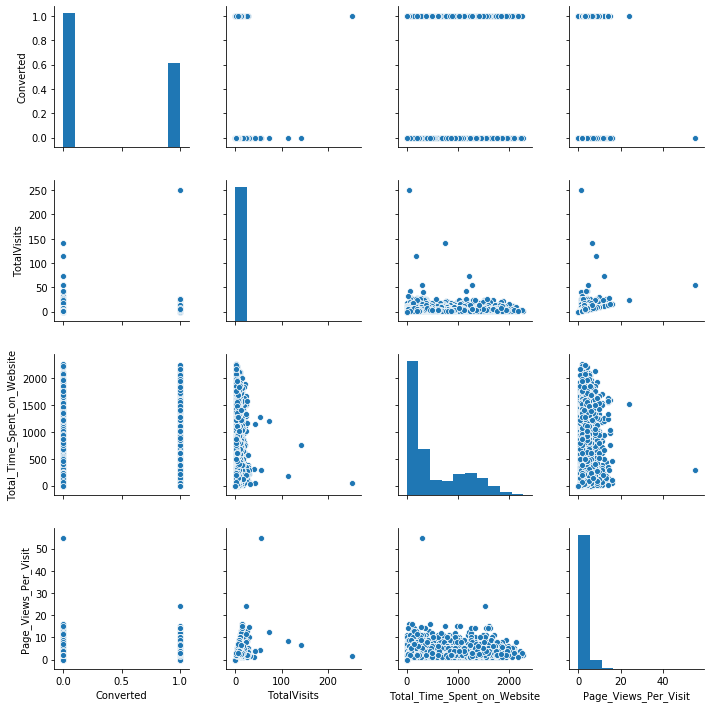

In [63]:
#Checking for the spread of data using pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(lead_score_df)

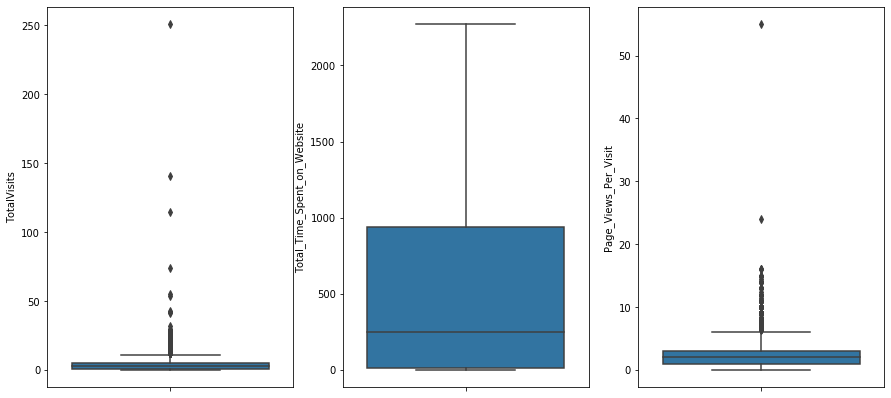

In [64]:
#Checking for data distribution using Boxplot
plt.figure(figsize=(15, 7))
i = 1
for var in num_var:
    plt.subplot(1, 3, i)
    if var != 'Converted':
        sns.boxplot(y=lead_score_df[var])
        i=i+1

In [65]:
#Checking for totalvists
lead_score_df.TotalVisits.sort_values(ascending=False).head(15)


6102    251.0
2322    141.0
5608    115.0
5283     74.0
2190     55.0
5538     54.0
1160     43.0
8230     42.0
5530     41.0
6580     32.0
1824     30.0
8001     29.0
2861     29.0
4471     28.0
7153     28.0
Name: TotalVisits, dtype: float64

In [66]:
#Sorting the values of totalvisits
lead_score_df[lead_score_df.TotalVisits > 30]['TotalVisits'].sort_values()

6580     32.0
5530     41.0
8230     42.0
1160     43.0
5538     54.0
2190     55.0
5283     74.0
5608    115.0
2322    141.0
6102    251.0
Name: TotalVisits, dtype: float64

In [67]:
lead_score_df.Page_Views_Per_Visit.sort_values(ascending=False).head(15)

2190    55.0
6805    24.0
5495    16.0
5164    16.0
125     16.0
387     15.0
5915    15.0
8640    15.0
4518    15.0
8001    14.5
6300    14.0
1697    14.0
5531    14.0
246     14.0
7685    14.0
Name: Page_Views_Per_Visit, dtype: float64

In [68]:
#As it can be seen that to treat outlier we need to set the limit
#We consider 30 as limit for totalvisits and consider visits as 30 and above.
#Same is the case with page_views_per_visit we set it as 16 so we consider page_views_per_visit as 16 and above

pageviews = np.array(lead_score_df['Page_Views_Per_Visit'].values.tolist())
lead_score_df['Page_Views_Per_Visit'] = np.where(pageviews > 16, 16, pageviews).tolist()

In [69]:
visits = np.array(lead_score_df['TotalVisits'].values.tolist())
lead_score_df['TotalVisits'] = np.where(visits > 30, 30, visits).tolist()

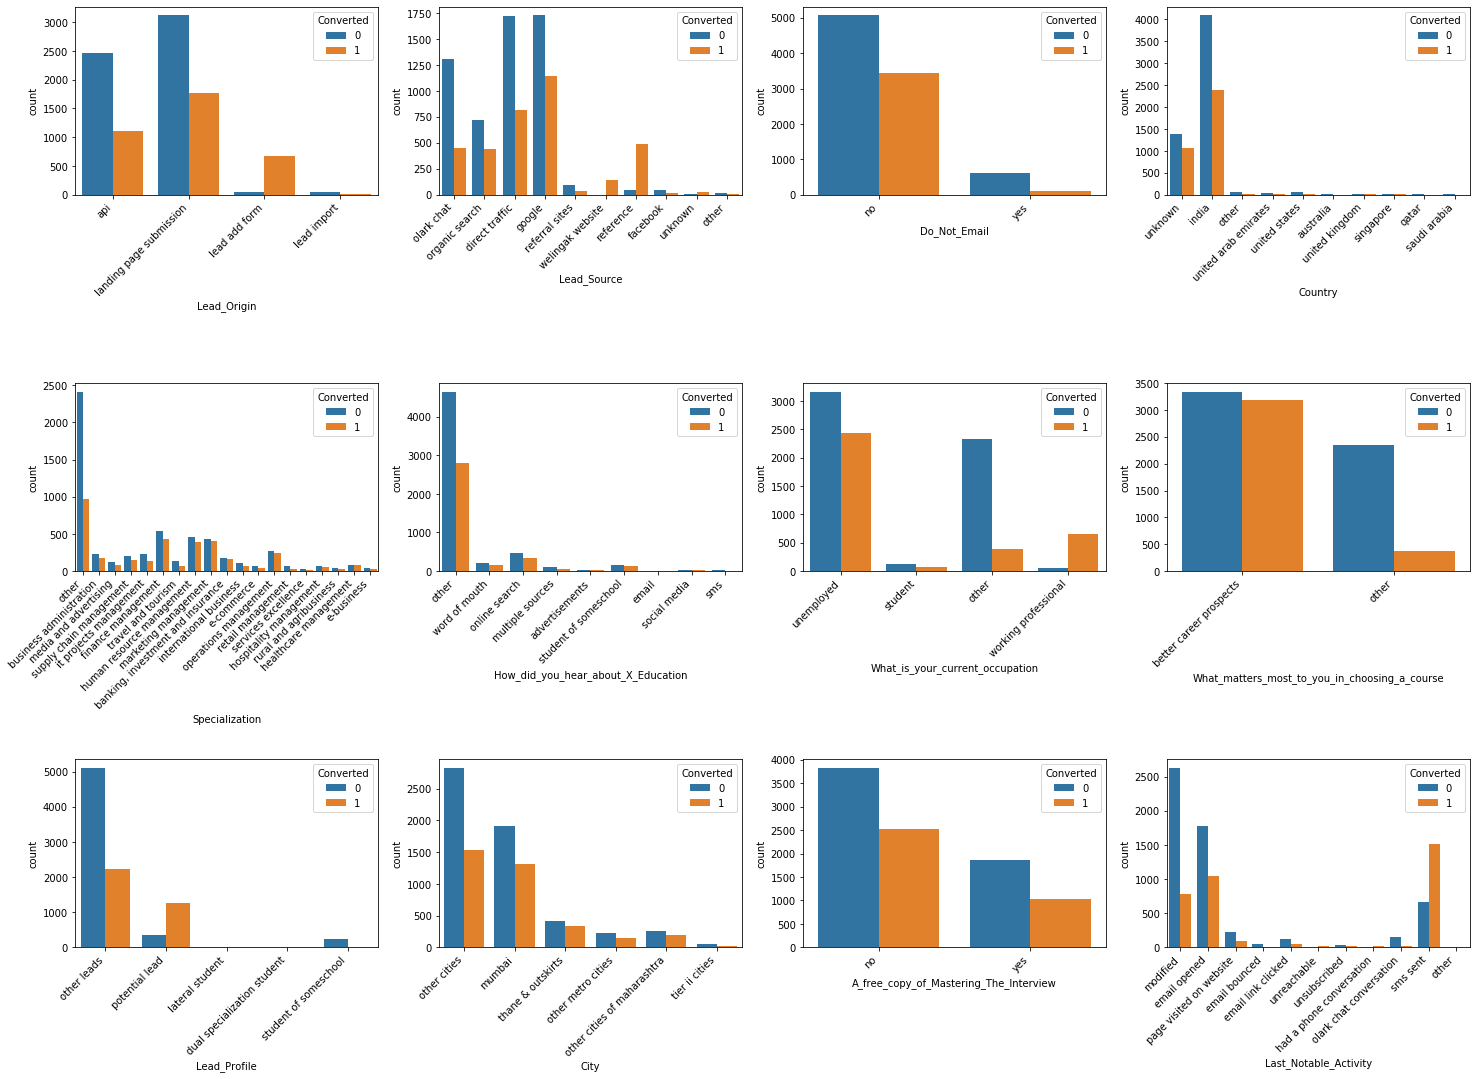

In [70]:
#Checking for converted and non converted leads for categorical variables
fig = plt.figure(figsize=(25, 45))

i = 1
for var in cat_var:
    plt.subplot(7, 4, i)
    ax=sns.countplot(x=lead_score_df[var], hue=lead_score_df["Converted"])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    i=i+1
plt.subplots_adjust(hspace = 1)


## Creating Dummy variables - Binary coding

In [71]:
lead_score_df.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Converted',
       'TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Country', 'Specialization', 'How_did_you_hear_about_X_Education',
       'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Lead_Profile', 'City',
       'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity'],
      dtype='object')

In [72]:
# Binary encode yes as 1 and no as 0
lead_score_df['Do_Not_Email'] = lead_score_df['Do_Not_Email'].map({'yes': 1, 'no': 0})
lead_score_df['A_free_copy_of_Mastering_The_Interview'] = lead_score_df['A_free_copy_of_Mastering_The_Interview'].map({'yes': 1, 'no': 0})
lead_score_df['What_matters_most_to_you_in_choosing_a_course'] = lead_score_df['What_matters_most_to_you_in_choosing_a_course'].map({'better career prospects': 1, 'other': 0})

In [73]:
#Create a list of categorical variables with more than 2 categories for dummy variable creation
list_cat_var = []
for column in cat_var:
    _ = lead_score_df[column].nunique()
    if _ > 2:
        list_cat_var.append(column)
        print("{:<30} = {}".format(column,_))

Lead_Origin                    = 4
Lead_Source                    = 10
Country                        = 10
Specialization                 = 19
How_did_you_hear_about_X_Education = 9
What_is_your_current_occupation = 4
Lead_Profile                   = 5
City                           = 6
Last_Notable_Activity          = 11


In [75]:
# Checking for the unique values in Categorical variables
for column in cat_var:
    print("Variable Name: ",column)
    display(lead_score_df[column].value_counts())
    print(5*"****************")

Variable Name:  Lead_Origin


landing page submission    4886
api                        3580
lead add form               719
lead import                  55
Name: Lead_Origin, dtype: int64

********************************************************************************
Variable Name:  Lead_Source


google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
facebook              55
unknown               36
other                 23
Name: Lead_Source, dtype: int64

********************************************************************************
Variable Name:  Do_Not_Email


0    8506
1     734
Name: Do_Not_Email, dtype: int64

********************************************************************************
Variable Name:  Country


india                   6492
unknown                 2466
other                     77
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
Name: Country, dtype: int64

********************************************************************************
Variable Name:  Specialization


other                                3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

********************************************************************************
Variable Name:  How_did_you_hear_about_X_Education


other                    7436
online search             808
word of mouth             348
student of someschool     310
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How_did_you_hear_about_X_Education, dtype: int64

********************************************************************************
Variable Name:  What_is_your_current_occupation


unemployed              5600
other                   2724
working professional     706
student                  210
Name: What_is_your_current_occupation, dtype: int64

********************************************************************************
Variable Name:  What_matters_most_to_you_in_choosing_a_course


1    6528
0    2712
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

********************************************************************************
Variable Name:  Lead_Profile


other leads                    7342
potential lead                 1613
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead_Profile, dtype: int64

********************************************************************************
Variable Name:  City


other cities                   4355
mumbai                         3222
thane & outskirts               752
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

********************************************************************************
Variable Name:  A_free_copy_of_Mastering_The_Interview


0    6352
1    2888
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

********************************************************************************
Variable Name:  Last_Notable_Activity


modified                    3407
email opened                2827
sms sent                    2172
page visited on website      318
olark chat conversation      183
email link clicked           173
email bounced                 60
unsubscribed                  47
unreachable                   32
had a phone conversation      14
other                          7
Name: Last_Notable_Activity, dtype: int64

********************************************************************************


In [76]:
#Creating new dataframe with dummy variables
lead_score_df_dummy = pd.get_dummies(lead_score_df,columns=list_cat_var,drop_first=True)

In [77]:
lead_score_df_dummy.head()

,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,What_matters_most_to_you_in_choosing_a_course,A_free_copy_of_Mastering_The_Interview,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,...,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email opened,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_other,Last_Notable_Activity_page visited on website,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed
0,0,0,0.0,0,0.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


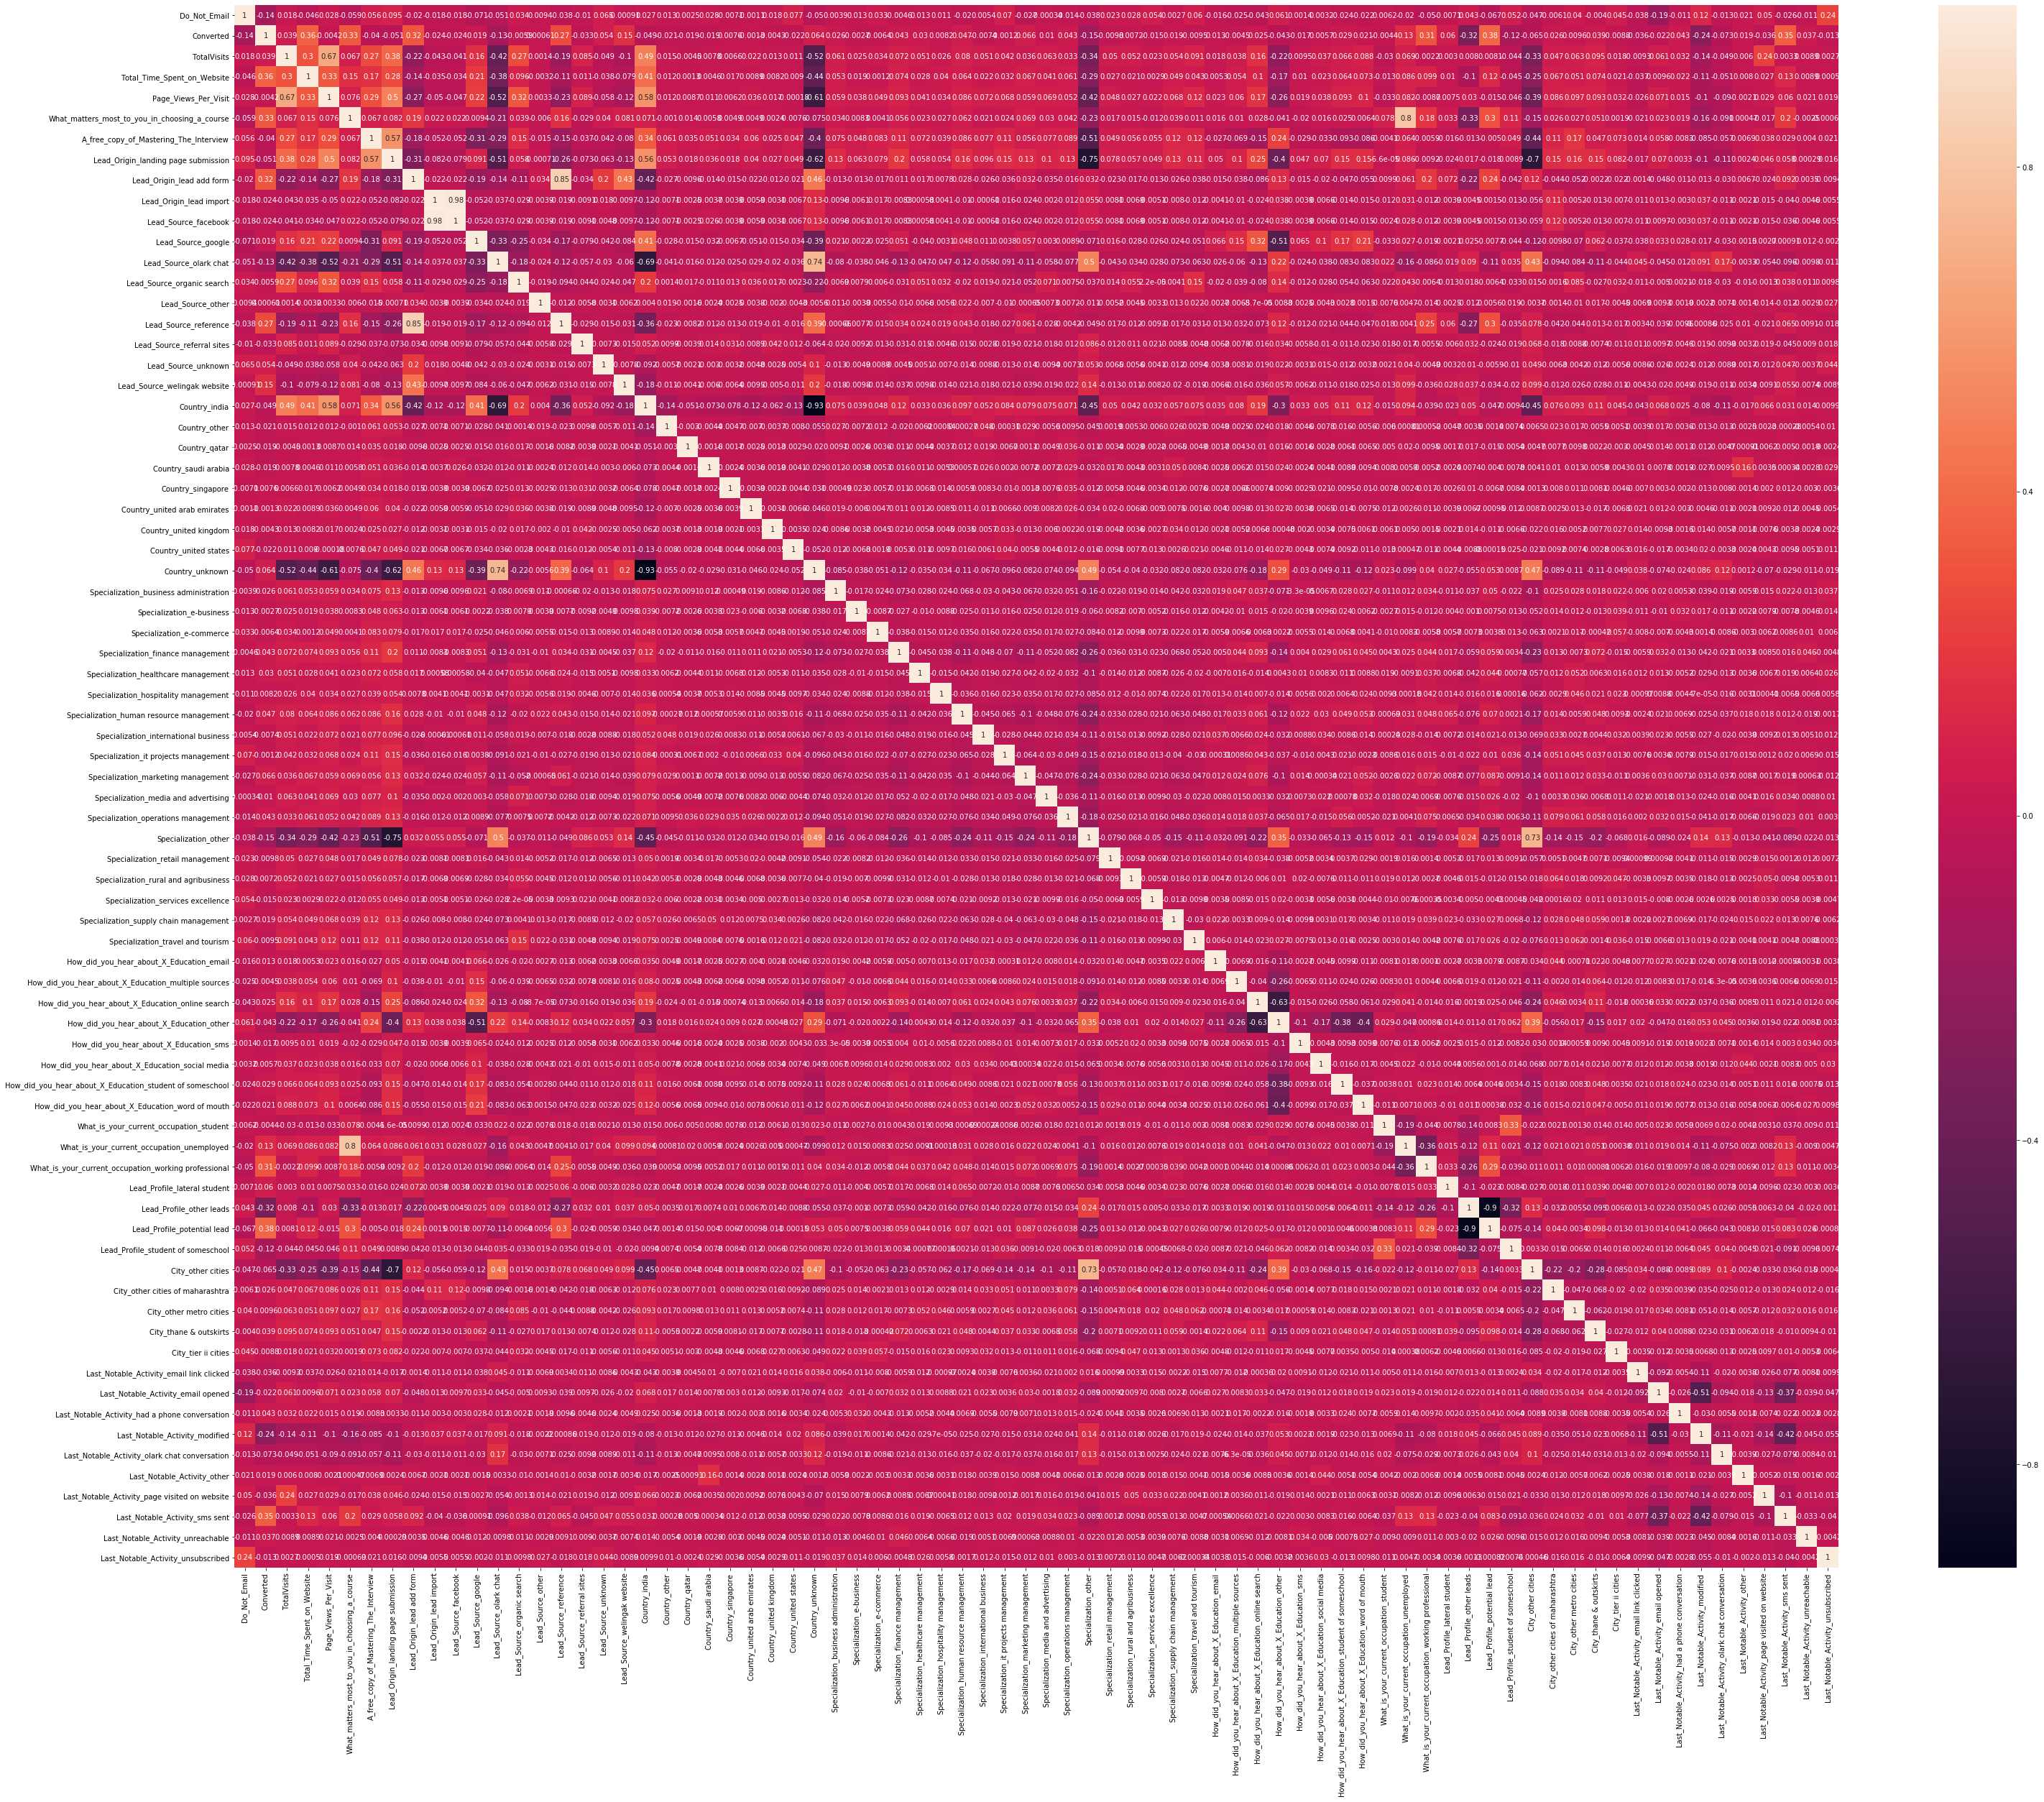

In [78]:
#correlation matrix 
plt.figure(figsize = (50,40))
sns.heatmap(lead_score_df_dummy.corr(),annot = True)

In [81]:
#To check for high correlation we find variables with correlation greater than 0.75
c_index = []
c_columns = []
c_value = []
for row in lead_score_df_dummy.columns:
    for column in lead_score_df_dummy.columns:
        if row != column:
            _ = lead_score_df_dummy[row].corr(lead_score_df_dummy[column])
            if _ > 0.7:
                
                if row < column:
                    c_index.append(row)
                    c_columns.append(column)
                    c_value.append(_)
                    
                else:
                    c_index.append(column)
                    c_columns.append(row)
                    c_value.append(_)

In [82]:
correlation_mat = pd.DataFrame([c_index,c_columns,c_value]).T.rename(columns={0:'Var 1',1:'Var 2',2:'coeff'})
correlation_mat = correlation_mat[correlation_mat.duplicated(subset=['Var 1'])]
correlation_mat

,Var 1,Var 2,coeff
3,Lead_Origin_lead import,Lead_Source_facebook,0.981709
5,Lead_Origin_lead add form,Lead_Source_reference,0.852594
6,Country_unknown,Lead_Source_olark chat,0.741415
8,What_is_your_current_occupation_unemployed,What_matters_most_to_you_in_choosing_a_course,0.798003
9,City_other cities,Specialization_other,0.728733


In [83]:
#Above df show the highly correlated variable and we can drop them
lead_score_df_dummy.drop(columns=correlation_mat['Var 2'],inplace=True)

In [84]:
#Final clean dataframe
lead_score_df_dummy.head()

,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,Lead_Source_google,...,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email opened,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_other,Last_Notable_Activity_page visited on website,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Train - test Data Split

In [85]:
from sklearn.model_selection import train_test_split
# Defining X
X = lead_score_df_dummy.drop(['Converted'],axis=1)
X.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,Lead_Source_google,Lead_Source_organic search,...,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email opened,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_other,Last_Notable_Activity_page visited on website,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
#Defining Y
Y = lead_score_df_dummy['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train & test in 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [88]:
#removing converted variable from numerical variable
num_var.remove('Converted')
num_var

['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit']

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,Lead_Source_google,Lead_Source_organic search,...,Last_Notable_Activity_email link clicked,Last_Notable_Activity_email opened,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_modified,Last_Notable_Activity_olark chat conversation,Last_Notable_Activity_other,Last_Notable_Activity_page visited on website,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed
1871,0,-0.951417,-0.885371,-1.137425,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.171687,0.005716,-0.491070,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0,0.452463,-0.691418,0.077528,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8105,0,0.452463,1.365219,1.292480,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,-0.951417,-0.885371,-1.137425,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building
### Logistic Regression Model 1

In [90]:
# importing necessary library for logistic regression 
import statsmodels.api as sm
#creating Logistic model 1
leadScore_m1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()).fit()
print(leadScore_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2431.6
Date:                Mon, 02 Mar 2020   Deviance:                       4863.2
Time:                        20:29:38   Pearson chi2:                 7.40e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [91]:
#train set - Predicted values
Y_train_pred = leadScore_m1.predict(sm.add_constant(X_train))
Y_train_pred[:10]

1871    0.326660
6795    0.127111
3516    0.309380
8105    0.836267
3934    0.137721
4844    0.997373
3297    0.164367
8071    0.992187
987     0.114498
7423    0.980920
dtype: float64

In [92]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.32665977, 0.12711134, 0.30937975, 0.83626682, 0.13772141,
       0.99737306, 0.16436655, 0.99218653, 0.11449796, 0.98092041])

In [94]:
#Lets check for the Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conv_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['LeadID'] = Y_train.index

#Creating a new column if Conv_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conv_Probability,Lead_Score,LeadID,Predicted
0,0,0.326660,32.665977,1871,0
1,0,0.127111,12.711134,6795,0
2,0,0.309380,30.937975,3516,0
3,0,0.836267,83.626682,8105,1
4,0,0.137721,13.772141,3934,0


In [95]:
#Importing necessary libraries for metrics
from sklearn import metrics

#create Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3580  422]
 [ 630 1836]]


In [96]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8373531230674088


In [97]:
# VIF (Variance Inflation Factor) 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Country_india,259.78
52,Lead_Profile_other leads,226.56
43,How_did_you_hear_about_X_Education_other,107.38
22,Country_unknown,100.20
63,Last_Notable_Activity_modified,57.73
53,Lead_Profile_potential lead,50.96
61,Last_Notable_Activity_email opened,49.14
67,Last_Notable_Activity_sms sent,38.15
42,How_did_you_hear_about_X_Education_online search,12.58
5,Lead_Origin_landing page submission,9.12


In [98]:
#Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 12)
rfe = rfe.fit(X_train, Y_train)

In [99]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True,  True])

In [100]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', True, 1),
 ('TotalVisits', False, 38),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 39),
 ('A_free_copy_of_Mastering_The_Interview', False, 55),
 ('Lead_Origin_landing page submission', False, 15),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Origin_lead import', False, 9),
 ('Lead_Source_google', False, 46),
 ('Lead_Source_organic search', False, 57),
 ('Lead_Source_other', False, 43),
 ('Lead_Source_referral sites', False, 50),
 ('Lead_Source_unknown', False, 56),
 ('Lead_Source_welingak website', True, 1),
 ('Country_india', False, 36),
 ('Country_other', False, 42),
 ('Country_qatar', True, 1),
 ('Country_saudi arabia', False, 5),
 ('Country_singapore', False, 54),
 ('Country_united arab emirates', False, 18),
 ('Country_united kingdom', False, 52),
 ('Country_united states', False, 35),
 ('Country_unknown', False, 2),
 ('Specialization_business administration', False, 34),
 ('Specialization_e-business', False, 37),
 ('Specializa

In [101]:
col = X_train.columns[rfe.support_]
list(col)

['Do_Not_Email',
 'Total_Time_Spent_on_Website',
 'Lead_Origin_lead add form',
 'Lead_Source_welingak website',
 'Country_qatar',
 'What_is_your_current_occupation_working professional',
 'Lead_Profile_other leads',
 'Lead_Profile_student of someschool',
 'Last_Notable_Activity_had a phone conversation',
 'Last_Notable_Activity_sms sent',
 'Last_Notable_Activity_unreachable',
 'Last_Notable_Activity_unsubscribed']

In [102]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page_Views_Per_Visit',
       'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_landing page submission', 'Lead_Origin_lead import',
       'Lead_Source_google', 'Lead_Source_organic search', 'Lead_Source_other',
       'Lead_Source_referral sites', 'Lead_Source_unknown', 'Country_india',
       'Country_other', 'Country_saudi arabia', 'Country_singapore',
       'Country_united arab emirates', 'Country_united kingdom',
       'Country_united states', 'Country_unknown',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
    

## Logistic Regression Model 2

In [103]:
X_train_sm = sm.add_constant(X_train[col])
#bulding secondary logistic model 
leadScore_m2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial()).fit()
print(leadScore_m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.0
Date:                Mon, 02 Mar 2020   Deviance:                       5222.0
Time:                        20:34:57   Pearson chi2:                 7.57e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [104]:
#Predicted values on the train set
Y_train_pred = leadScore_m2.predict(X_train_sm)
Y_train_pred[:10]

1871    0.083084
6795    0.170497
3516    0.097714
8105    0.791305
3934    0.083084
4844    0.997421
3297    0.094644
8071    0.994963
987     0.262993
7423    0.974358
dtype: float64

In [105]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.08308436, 0.17049704, 0.09771413, 0.7913054 , 0.08308436,
       0.99742071, 0.09464419, 0.99496338, 0.26299316, 0.97435758])

In [106]:
#Lets check for the Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conv_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['LeadID'] = Y_train.index

#Creating a new column if Conv_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()


,Converted,Conv_Probability,Lead_Score,LeadID,Predicted
0,0,0.083084,8.308436,1871,0
1,0,0.170497,17.049704,6795,0
2,0,0.097714,9.771413,3516,0
3,0,0.791305,79.130540,8105,1
4,0,0.083084,8.308436,3934,0


In [107]:

#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3625  377]
 [ 786 1680]]


In [108]:

#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8201917130488559


In [109]:

# VIF (Variance Inflation Factor) 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.38
6,Lead_Profile_other leads,1.32
9,Last_Notable_Activity_sms sent,1.32
3,Lead_Source_welingak website,1.24
0,Do_Not_Email,1.16
5,What_is_your_current_occupation_working profes...,1.15
11,Last_Notable_Activity_unsubscribed,1.07
1,Total_Time_Spent_on_Website,1.06
7,Lead_Profile_student of someschool,1.01
4,Country_qatar,1.00


In [110]:
# p-value for country_qatar is very high (0.999) so we drop and rebuild the model
col = col.drop('Country_qatar', 1)
col

Index(['Do_Not_Email', 'Total_Time_Spent_on_Website',
       'Lead_Origin_lead add form', 'Lead_Source_welingak website',
       'What_is_your_current_occupation_working professional',
       'Lead_Profile_other leads', 'Lead_Profile_student of someschool',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_sms sent', 'Last_Notable_Activity_unreachable',
       'Last_Notable_Activity_unsubscribed'],
      dtype='object')

## Logistic Regression Model 3

In [111]:
X_train_sm = sm.add_constant(X_train[col])
#bulding third logistic model 
leadScore_m3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial()).fit()
leadScore_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.4
Date:                Mon, 02 Mar 2020   Deviance:                       5228.7
Time:                        20:36:30   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1574      0.088      1.781      0.075      -0.016       0.331
Do_Not_Email                                            -1.4043      0.174     -8.081      0.000      -1.745      -1.064
Total_Time_Spent_on_Website                              0.9175      0.035     26.104      0.000       0.849       0.986
Lead_Origin_lead add form                                2.9471      0.190     15.474      0.000       2.574       3.320
Lead_Source_welingak website                             2.6447      0.748      3.536      0.000       1.179       4.111
What_is_your_current_occupation_working professional     2.4252      0.192     12.664      0.000       2.050       2.800
Lead_Profile_other leads                                -1.7475      0.095    -18.450      0.000      -1.933      -1.562
Lead_Profile_student of someschool                      -3.3274      0.428     -7.771      0.000      -4.167      -2.488
Last_Notable_Activity_had a phone conversation           2.8195      1.150      2.451      0.014       0.565       5.074
Last_Notable_Activity_sms sent                           1.6633      0.079     21.075      0.000       1.509       1.818
Last_Notable_Activity_unreachable                        1.5023      0.546      2.751      0.006       0.432       2.573
Last_Notable_Activity_unsubscribed                       1.3267      0.539      2.459      0.014       0.269       2.384
========================================================================================================================
"""

In [112]:
#Predicted values on the train set
Y_train_pred = leadScore_m3.predict(X_train_sm)
Y_train_pred[:10]

1871    0.082984
6795    0.170104
3516    0.097570
8105    0.790148
3934    0.082984
4844    0.997414
3297    0.094509
8071    0.994982
987     0.262264
7423    0.974228
dtype: float64

In [113]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.08298393, 0.17010392, 0.09756985, 0.7901477 , 0.08298393,
       0.99741416, 0.09450936, 0.99498216, 0.26226354, 0.97422835])

In [114]:
#Lets check for the Actual and predicted values
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 
                                   'Conv_Probability':Y_train_pred, 
                                   'Lead_Score': Y_train_pred*100})
Y_train_pred_final['LeadID'] = Y_train.index

#Creating a new column if Conv_Probability > 0.5 assign 1 else 0
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Conv_Probability,Lead_Score,LeadID,Predicted
0,0,0.082984,8.298393,1871,0
1,0,0.170104,17.010392,6795,0
2,0,0.097570,9.756985,3516,0
3,0,0.790148,79.014770,8105,1
4,0,0.082984,8.298393,3934,0


In [115]:
#Confusion matrix 
Confusion_Mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(Confusion_Mat)

[[3627  375]
 [ 787 1679]]


In [116]:
#Accuracy Score
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8203463203463204


In [117]:
# VIF (Variance Inflation Factor) 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.38
5,Lead_Profile_other leads,1.32
8,Last_Notable_Activity_sms sent,1.32
3,Lead_Source_welingak website,1.24
0,Do_Not_Email,1.16
4,What_is_your_current_occupation_working profes...,1.15
10,Last_Notable_Activity_unsubscribed,1.07
1,Total_Time_Spent_on_Website,1.06
6,Lead_Profile_student of someschool,1.01
7,Last_Notable_Activity_had a phone conversation,1.00


As the p-value is < 0.5 and VIF is also < 5, we will stop removing the features manually

In [118]:
# Final list of Columns
list(col)

['Do_Not_Email',
 'Total_Time_Spent_on_Website',
 'Lead_Origin_lead add form',
 'Lead_Source_welingak website',
 'What_is_your_current_occupation_working professional',
 'Lead_Profile_other leads',
 'Lead_Profile_student of someschool',
 'Last_Notable_Activity_had a phone conversation',
 'Last_Notable_Activity_sms sent',
 'Last_Notable_Activity_unreachable',
 'Last_Notable_Activity_unsubscribed']

In [119]:
round(leadScore_m3.params.sort_values(ascending=False),4)

Lead_Origin_lead add form                               2.9471
Last_Notable_Activity_had a phone conversation          2.8195
Lead_Source_welingak website                            2.6447
What_is_your_current_occupation_working professional    2.4252
Last_Notable_Activity_sms sent                          1.6633
Last_Notable_Activity_unreachable                       1.5023
Last_Notable_Activity_unsubscribed                      1.3267
Total_Time_Spent_on_Website                             0.9175
const                                                   0.1574
Do_Not_Email                                           -1.4043
Lead_Profile_other leads                               -1.7475
Lead_Profile_student of someschool                     -3.3274
dtype: float64

## Metrics

In [120]:
#True positive 
TP = Confusion_Mat[1,1] 
#True negatives
TN = Confusion_Mat[0,0] 
#False positives
FP = Confusion_Mat[0,1] 
#False negatives
FN = Confusion_Mat[1,0]

In [121]:
#Specificity - Model
TN / float(TN+FP)

0.9062968515742129

In [122]:
#Sensitivity  - Model
TP / float(TP+FN)

0.680859691808597

In [123]:
# positive predictive value 
print (TP / float(TP+FP))


0.817429406037001


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8217036701404622


In [125]:
#Calculate false postive rate
print(FP/ float(TN+FP))

0.0937031484257871


## Plotting the ROC Curve


In [133]:
# plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="upper left")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, 
                                         Y_train_pred_final.Conv_Probability, 
                                         drop_intermediate = False )

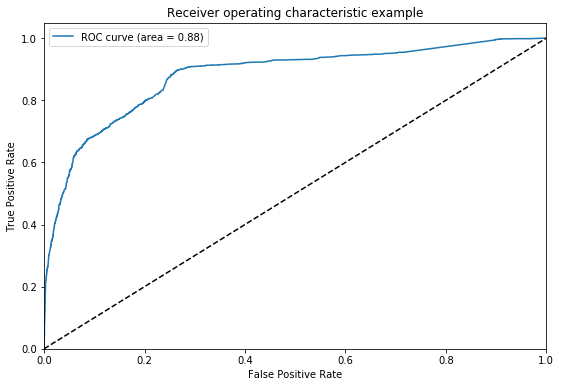

In [135]:
#drawing ROC curve
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conv_Probability)

## Finding Optimal Cutoff Point

In [136]:
#Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conv_Probability,Lead_Score,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082984,8.298393,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.170104,17.010392,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.097570,9.756985,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.790148,79.014770,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.082984,8.298393,3934,0,1,0,0,0,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    mat = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(mat))
    Accuracy = (mat[0,0]+mat[1,1])/total1
    Specificity = mat[0,0]/(mat[0,0]+mat[0,1])
    Sensitivity = mat[1,1]/(mat[1,0]+mat[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.617656     0.941606     0.418041
0.2          0.2  0.788652     0.903487     0.717891
0.3          0.3  0.797774     0.878751     0.747876
0.4          0.4  0.805504     0.755880     0.836082
0.5          0.5  0.820346     0.680860     0.906297
0.6          0.6  0.819573     0.630170     0.936282
0.7          0.7  0.800093     0.553933     0.951774
0.8          0.8  0.773500     0.453771     0.970515
0.9          0.9  0.733148     0.319951     0.987756


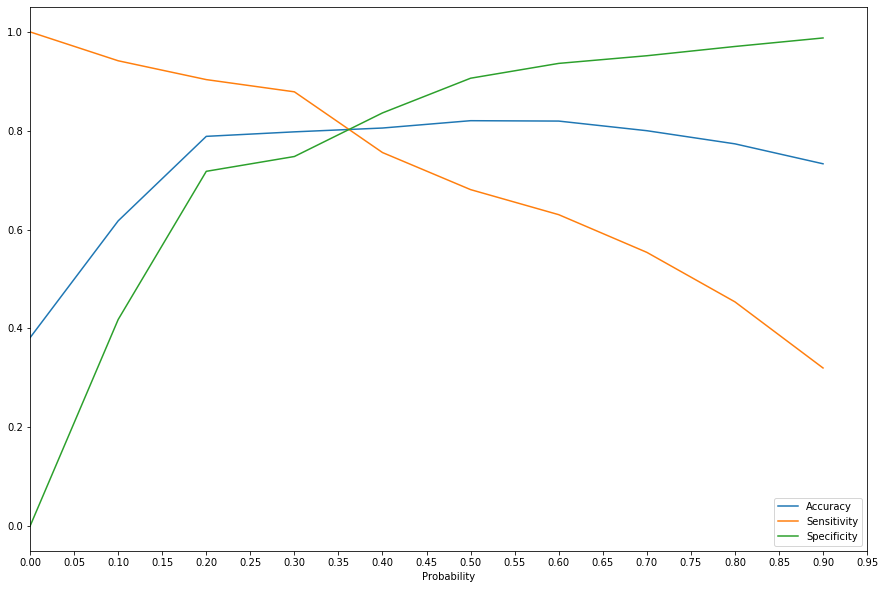

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'],figsize=(15,10))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability

## Precision and recall tradeoff

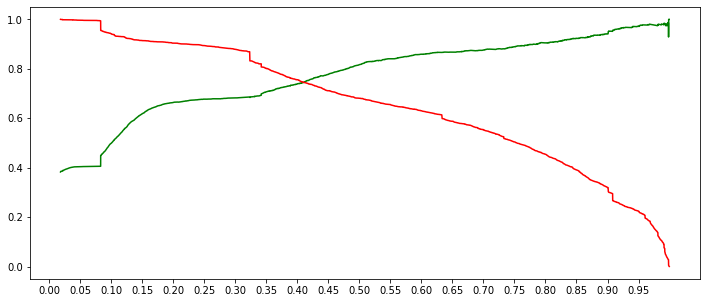

In [141]:
#importing necesary libraries for Precision recall curve
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conv_Probability)
plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

As per Precision-Recall Tradeoff, the cutoff is around 0.41 (after 0.4) . We can chooose the cut-off as 0.41 and use the Precision-Recall-Accuracy metrics to evaluate the model.

In [157]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conv_Probability.map( lambda x: 1 if x > 0.45 else 0)
Y_train_pred_final.head()

,Converted,Conv_Probability,Lead_Score,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.082984,8.298393,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.170104,17.010392,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.097570,9.756985,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.790148,79.014770,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.082984,8.298393,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [158]:
#Overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8123067408781695

In [159]:
Confusion_Mat2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
Confusion_Mat2

array([[3500,  502],
       [ 712, 1754]], dtype=int64)

In [160]:
#True positive 
TP = Confusion_Mat2[1,1] 

#True negatives
TN = Confusion_Mat2[0,0] 

#False positives
FP = Confusion_Mat2[0,1] 

#False negatives
FN = Confusion_Mat2[1,0]

In [161]:
#Specificity
TN / float(TN+FP)

0.8745627186406797

In [162]:
#Sensitivity
TP / float(TP+FN)

0.7112733171127331

In [163]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7774822695035462


In [164]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8309591642924976


In [152]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.15742128935532235


## Train - Accuracy , Precision, Recall and Specificity

In [165]:
#Accuracy
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8123067408781695

In [166]:
# Precision 
TP / float(TP + FP)

0.7774822695035462

In [167]:
# Recall 
TP / float(TP + FN)

0.7112733171127331

In [168]:
#Specificity
TN / float(TN+FP)

0.8745627186406797

## Making predictions on the test set

In [169]:
X_test[num_var] = scaler.transform(X_test[num_var])

In [170]:
X_test = X_test[col]
X_test.head()

,Do_Not_Email,Total_Time_Spent_on_Website,Lead_Origin_lead add form,Lead_Source_welingak website,What_is_your_current_occupation_working professional,Lead_Profile_other leads,Lead_Profile_student of someschool,Last_Notable_Activity_had a phone conversation,Last_Notable_Activity_sms sent,Last_Notable_Activity_unreachable,Last_Notable_Activity_unsubscribed
4269,0,0.964504,0,0,0,1,0,0,1,0,0
2376,0,-0.885371,1,0,0,1,0,0,1,0,0
7766,0,-0.777416,0,0,1,1,0,0,0,1,0
9199,0,-0.885371,0,0,0,0,0,0,0,0,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0


In [171]:
X_test_sm = sm.add_constant(X_test)

In [172]:
Y_test_pred = leadScore_m3.predict(X_test_sm)

In [173]:
Y_test_pred[:10]

4269    0.722752
2376    0.900959
7766    0.835354
9199    0.341870
4359    0.908220
9186    0.884506
1631    0.739944
8963    0.448917
8007    0.138839
5324    0.384492
dtype: float64

In [174]:
#Y Pred
Y_pred_1 = pd.DataFrame(Y_test_pred)
Y_pred_1.head()

,0
4269,0.722752
2376,0.900959
7766,0.835354
9199,0.341870
4359,0.908220


In [176]:
#Y Test
Y_test_df = pd.DataFrame(Y_test)
Y_test_df['LeadID'] = Y_test_df.index

In [177]:

# Combined df 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [178]:

Y_pred_final = pd.concat([Y_test_df, Y_pred_1 , Y_pred_1*100],axis=1)
Y_pred_final.head()

,Converted,LeadID,0,0
0,1,4269,0.722752,72.275197
1,1,2376,0.900959,90.095913
2,1,7766,0.835354,83.535395
3,0,9199,0.341870,34.187006
4,1,4359,0.908220,90.822004


In [179]:
#Adding columns to df
Y_pred_final.columns = [ 'Converted' , 'LeadID', 'Conv_Probability' , 'Lead_Score']
Y_pred_final.head()

,Converted,LeadID,Conv_Probability,Lead_Score
0,1,4269,0.722752,72.275197
1,1,2376,0.900959,90.095913
2,1,7766,0.835354,83.535395
3,0,9199,0.341870,34.187006
4,1,4359,0.908220,90.822004


In [181]:
#precision - recall
Y_pred_final['final_predicted'] = Y_pred_final.Conv_Probability.map(lambda x: 1 if x > 0.45 else 0)
Y_pred_final.head()

,Converted,LeadID,Conv_Probability,Lead_Score,final_predicted
0,1,4269,0.722752,72.275197,1
1,1,2376,0.900959,90.095913,1
2,1,7766,0.835354,83.535395,1
3,0,9199,0.341870,34.187006,0
4,1,4359,0.908220,90.822004,1


In [182]:
Confusion_Mat3 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
Confusion_Mat3

array([[1483,  194],
       [ 323,  772]], dtype=int64)

In [183]:
#True positive 
TP = Confusion_Mat3[1,1] 

#True negatives
TN = Confusion_Mat3[0,0] 

#False positives
FP = Confusion_Mat3[0,1] 

#False negatives
FN = Confusion_Mat3[1,0]

## Test - Accuracy , Precision, Recall and Specificity

In [184]:
# Accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.8134920634920635

In [185]:
# Precision
TP / float(TP+FP)

0.7991718426501035

In [186]:
# Recall
TP / float(TP+FN)

0.7050228310502283

In [187]:
#Specificity
TN / float(TN+FP)

0.8843172331544424

In [189]:
#Varying the cutoff range
prob = []
potential_leads = []
for i in np.arange(0.05,1,0.05):
    prob.append(i)
    potential_leads.append(sum(Y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > i else 0)) + 
                           sum(Y_pred_final.Conv_Probability.map(lambda x: 1 if x > i else 0)))

In [190]:
projected_leads = pd.DataFrame([prob,potential_leads]).T.rename(columns={0:'Probability Cut-Off',1:'Projected Leads'})

In [191]:
projected_leads

,Probability Cut-Off,Projected Leads
0,0.05,8691.0
1,0.10,6694.0
2,0.15,5210.0
3,0.20,4801.0
4,0.25,4651.0
5,0.30,4527.0
6,0.35,3974.0
7,0.40,3578.0
8,0.45,3222.0
9,0.50,2933.0


In [193]:
#Merging the original dataframe
Lead_list = list(Y_train_pred_final.LeadID)
Lead_list.extend(Y_pred_final.LeadID)

In [194]:
#Lead Scores
Score_list = list(Y_train_pred_final.Lead_Score)
Score_list.extend(Y_pred_final.Lead_Score)

In [195]:
#Predicted Value
Pred_list = list(Y_train_pred_final.final_predicted)
Pred_list.extend(Y_pred_final.final_predicted)

In [198]:
# Creating a dataframe using the above 3
Lead_Score_Predication = pd.DataFrame([Lead_list,Score_list,Pred_list]).T.\
rename(columns={0:'LeadID',1 : 'Lead_Score', 2:'Final_Prediction'})
#changing the data type
Lead_Score_Predication.Final_Prediction = Lead_Score_Predication.Final_Prediction.astype('int')
Lead_Score_Predication.LeadID = Lead_Score_Predication.LeadID.astype('int')
#reset the index
Lead_Score_Predication.set_index(Lead_Score_Predication.LeadID,drop=False,inplace=True)
#top 5 rows
Lead_Score_Predication.head()

,LeadID,Lead_Score,Final_Prediction
LeadID,,,
1871,1871,8.298393,0
6795,6795,17.010392,0
3516,3516,9.756985,0
8105,8105,79.014770,1
3934,3934,8.298393,0


In [199]:
#Original data
Original_df = pd.read_csv('Leads.csv',encoding='utf-8')

In [200]:
#Merge lead_score_predication and Original data
Final_df = pd.merge(Original_df, Lead_Score_Predication,left_index=True,right_index=True)
Final_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadID,Lead_Score,Final_Prediction
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,8.298393,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,21.909451,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,2,87.180197,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,02.Medium,01.High,13.0,17.0,No,No,Modified,3,13.119467,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,02.Medium,01.High,15.0,18.0,No,No,Modified,4,49.872053,1
